In [ ]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape
from keras.models import Model
np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def addNoise(image):
    noiseAddedImage = np.copy(image)
    coords = [np.random.randint(0, i, int(np.ceil(image.size * 0.5)))
              for i in image.shape]
    coords = [np.clip(c, 0, i - 1) for c, i in zip(coords, image.shape)]
    noiseAddedImage[tuple(coords)] = 1
    coords = [np.random.randint(0, i, int(np.ceil(image.size * (1.0 - 0.5))))
              for i in image.shape]
    coords = [np.clip(c, 0, i - 1) for c, i in zip(coords, image.shape)]
    noiseAddedImage[tuple(coords)] = 0
    return noiseAddedImage

In [ ]:
InputPath="/content/drive/MyDrive/LOLdataset/our485/high"

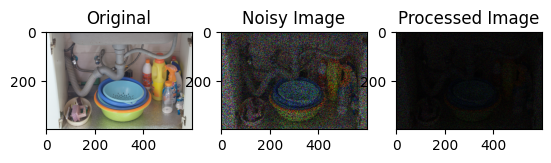

In [ ]:
# Specify the path to the image
input_path = "/content/drive/MyDrive/LOLdataset/our485/high/105.png"

# Load the image
img = cv.imread(input_path)

# Check if the image is loaded successfully
if img is None:
    print(f"Error: Unable to load image from {input_path}")
else:
    # Convert to RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original")

    # Add noise to the image
    plt.subplot(1, 3, 2)
    Noise = addNoise(img)
    plt.imshow(Noise)
    plt.title("Noisy Image")

    # Apply additional processing (e.g., HSV conversion and noise)
    plt.subplot(1, 3, 3)
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    hsv[..., 2] = hsv[..., 2] * 0.2
    img1 = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)
    Noise2 = addNoise(img1)
    plt.imshow(Noise2)
    plt.title("Processed Image")

    plt.show()



In [ ]:
from tqdm import tqdm
import os
import cv2 as cv
import numpy as np

HighPath = "/content/drive/MyDrive/LOLdataset/our485/high"

def PreProcessData(HighPath):
    X_ = []
    y_ = []
    count = 0

    for imageName in tqdm(os.listdir(HighPath)):
        count += 1
        low_img = cv.imread(os.path.join(HighPath, imageName))

        if low_img is not None:
            low_img = cv.cvtColor(low_img, cv.COLOR_BGR2RGB)
            low_img = cv.resize(low_img, (500, 500))

            hsv = cv.cvtColor(low_img, cv.COLOR_RGB2HSV)
            hsv[..., 2] = hsv[..., 2] * 0.2
            img_1 = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)

            Noisy_img = addNoise(img_1)

            X_.append(Noisy_img)
            y_.append(low_img)

    X_ = np.array(X_)
    y_ = np.array(y_)

    return X_, y_

# Example usage
X_data, y_data = PreProcessData(HighPath)


100%|██████████| 486/486 [00:44<00:00, 10.94it/s]


In [ ]:
K.clear_session()
def InstantiateModel(in_):

    model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
    model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)

    model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_2_0 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_add = add([model_1,model_2,model_2_0])

    model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
    model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)

    model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)

    model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add)

    model_add_2 = add([model_3_1,model_3_2,model_3])

    model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
    model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add)

    model_add_3 = add([model_4_1,model_add_2,model_4])

    model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
    model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)

    model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)

    return model_5


In [ ]:
Input_Sample = Input(shape=(500, 500,3))
print("inputsample:",Input_Sample )
Output_ = InstantiateModel(Input_Sample)
print("inputsample:",Output_ )
Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)
Model_Enhancer.compile(optimizer="adam", loss='mean_squared_error',metrics=['accuracy'])
Model_Enhancer.summary()

inputsample: KerasTensor(type_spec=TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
inputsample: KerasTensor(type_spec=TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name=None), name='conv2d_16/Relu:0', description="created by layer 'conv2d_16'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500, 500, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 500, 500, 16)         448       ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 500, 500, 32)    

In [ ]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,500,500,3)
        y_input = y[i].reshape(1,500,500,3)
        yield (X_input,y_input)
Model_Enhancer.fit_generator(GenerateInputs(X_data,y_data),epochs=75,verbose=1,steps_per_epoch=6,shuffle=True) #epochs * steps_per_epoch <= training dataset images...

Epoch 1/75


<ipython-input-9-e33e22ea11fb>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model_Enhancer.fit_generator(GenerateInputs(X_data,y_data),epochs=75,verbose=1,steps_per_epoch=6,shuffle=True) #epochs * steps_per_epoch <= training dataset images...


6/6 [==============================] - 12s 98ms/step - loss: 9639.5771 - accuracy: 0.5064
Epoch 2/75
6/6 [==============================] - 1s 98ms/step - loss: 8710.5449 - accuracy: 0.6790
Epoch 3/75
6/6 [==============================] - 1s 96ms/step - loss: 1616.4752 - accuracy: 0.3315
Epoch 4/75
6/6 [==============================] - 1s 98ms/step - loss: 1161.8438 - accuracy: 0.2079
Epoch 5/75
6/6 [==============================] - 1s 98ms/step - loss: 831.1641 - accuracy: 0.4309
Epoch 6/75
6/6 [==============================] - 1s 97ms/step - loss: 527.7003 - accuracy: 0.2247
Epoch 7/75
6/6 [==============================] - 1s 96ms/step - loss: 392.4384 - accuracy: 0.2352
Epoch 8/75
6/6 [==============================] - 1s 96ms/step - loss: 621.9283 - accuracy: 0.3360
Epoch 9/75
6/6 [==============================] - 1s 96ms/step - loss: 575.3382 - accuracy: 0.4621
Epoch 10/75
6/6 [==============================] - 1s 96ms/step - loss: 437.6296 - accuracy: 0.4237
Epoch 11/75
6/6

In [ ]:
model_save_path = "/content/drive/MyDrive/my_model.h5"
Model_Enhancer.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predctions on new input

In [ ]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 12.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl s

## Gradio Interface

In [ ]:
import gradio as gr
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model_path = "/content/drive/MyDrive/my_model.h5"  # Replace this with the path to your model
Model_Enhancer = load_model(model_path)

# Define preprocess_input and postprocess_output functions
def preprocess_input(image):
    resized_image = cv2.resize(image, (500, 500))  # Resize to match model's input size
    return resized_image

def postprocess_output(image):
    # Convert image to RGB
    img_low_light = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to each color channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    channels = [clahe.apply(channel) for channel in cv2.split(img_low_light)]
    img_enhanced = cv2.merge(channels)

    # Apply gamma correction for further enhancement
    gamma = 1.2
    img_enhanced = np.power(img_enhanced / 255.0, gamma) * 255.0
    img_enhanced = np.clip(img_enhanced, 0, 255).astype(np.uint8)

    # Apply color balancing to enhance color
    img_enhanced = cv2.xphoto.createSimpleWB().balanceWhite(img_enhanced)

    # Convert image back to BGR
    img_enhanced_bgr = cv2.cvtColor(img_enhanced, cv2.COLOR_RGB2BGR)

    return img_enhanced_bgr

# Define the function to process input and generate output
def enhance_image(input_image):
    try:
        # Preprocess input image
        preprocessed_input = preprocess_input(input_image)

        # Generate prediction using the model
        enhanced_image = Model_Enhancer.predict(np.expand_dims(preprocessed_input, axis=0))

        # Post-process the enhanced image
        postprocessed_image = postprocess_output(preprocessed_input)

        return postprocessed_image
    except Exception as e:
        return np.zeros((500, 500, 3), dtype=np.uint8)  # Return blank image if an error occurs

# Define Gradio interface
iface = gr.Interface(fn=enhance_image, inputs="image", outputs="image", title="Image Enhancement")

# Run the Gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a7b7345d74e8525790.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
